# NLTK Chapter 5

## Categorizing and Tagging Words

*The html version of this page is available [here](https://www.nltk.org/book/ch02.html "ch02").*

### 1 Using a Tagger

In [1]:
import nltk, re, pprint

In [8]:
from nltk import word_tokenize

text = word_tokenize("And now for something completely different")
print(nltk.pos_tag(text), end = '')

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]

*To get information on any tag, use `nltk.help.upenn_tagset('')`.*

In [11]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


*An example with homonyms:*

In [13]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
print(nltk.pos_tag(text), end = '')

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]

*__Your Turn:__ Many words, like __ski__ and __race__, can be used as nouns or verbs with no difference in pronunciation. Can you think of others? Hint: think of a commonplace object and try to put the word to before it to see if it can also be a verb, or think of an action and try to put the before it to see if it can also be a noun. Now make up a sentence with both uses of this word, and run the POS-tagger on this sentence.*

In [14]:
text = word_tokenize("They said they would contest the results of the contest")
print(nltk.pos_tag(text), end = '')

[('They', 'PRP'), ('said', 'VBD'), ('they', 'PRP'), ('would', 'MD'), ('contest', 'VB'), ('the', 'DT'), ('results', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('contest', 'NN')]

In [15]:
text = word_tokenize("They tried to record the new world record")
print(nltk.pos_tag(text), end = '')

[('They', 'PRP'), ('tried', 'VBD'), ('to', 'TO'), ('record', 'VB'), ('the', 'DT'), ('new', 'JJ'), ('world', 'NN'), ('record', 'NN')]

The `text.similar()` method takes a word $w$, finds all contexts $w_1 w$ $w_2$, then finds all words $w'$ that appear in the same context, i.e. $w_1 w' w_2$.

In [17]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [18]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [19]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [20]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


### 2 Tagged Corpora

#### 2.1 Representing Tagged Tokens

*You can created a tagged token with `str2tuple()`:*

In [21]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [22]:
tagged_token[0]

'fly'

In [23]:
tagged_token[1]

'NN'

*Converting a string to a list of tagged tokens:*

In [25]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
print([nltk.tag.str2tuple(t) for t in sent.split()], end = '')

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]

#### 2.2 Reading Tagged Corpora

*Finding tags for NLTK corpora:*

In [26]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

*Changing tagsets:*

In [29]:
nltk.corpus.brown.tagged_words(tagset = 'universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

*More examples:*

In [32]:
print(nltk.corpus.nps_chat.tagged_words(), end = '')

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]

In [36]:
print(nltk.corpus.conll2000.tagged_words(), end = '')

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [39]:
print(nltk.corpus.treebank.tagged_words(), end = '')

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

*Different use different corpora use different tags. Set `tagset = 'universal'` for a consistent set of tags:* 

In [41]:
print(nltk.corpus.brown.tagged_words(tagset = 'universal'), end = '')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [42]:
print(nltk.corpus.treebank.tagged_words(tagset = 'universal'), end = '')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

*Tags are also available for corpora in other languages.  When tags use non-ASCII, Python displays this in hexadecimal when printing larger structures such as a list:*

In [44]:
nltk.download('sinica_treebank')

[nltk_data] Downloading package sinica_treebank to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sinica_treebank.zip.


True

In [45]:
print(nltk.corpus.sinica_treebank.tagged_words(), end = '')

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [48]:
print(nltk.corpus.indian.tagged_words(), end = '')

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [51]:
print(nltk.corpus.mac_morpho.tagged_words(), end = '')

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [54]:
print(nltk.corpus.conll2002.tagged_words(), end = '')

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [57]:
print(nltk.corpus.cess_cat.tagged_words(), end = '')

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

*Most corpora also have a `tagged_sents()` method, which is more useful than `tagged_words()` when developing automatic taggers.*

In [58]:
print(nltk.corpus.indian.tagged_sents(), end = '')

[[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ('তোড়া', 'NNP'), ('উপজাতি', 'NN'), ('৷', 'SYM')], [('বাসস্থান-ঘরগৃহস্থালি', 'NN'), ('তোড়া', 'NNP'), ('ভাষায়', 'NN'), ('গ্রামকেও', 'NN'), ('বলে', 'VM'), ('`', 'SYM'), ('মোদ', 'NN'), ("'", 'SYM'), ('৷', 'SYM')], ...]

In [59]:
print(nltk.corpus.cess_cat.tagged_sents(), end = '')

[[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ('-Fpa-', 'Fpa'), ('TS', 'np0000o'), ('-Fpt-', 'Fpt'), ('ha', 'vaip3s0'), ('confirmat', 'vmp00sm'), ('la', 'da0fs0'), ('condemna', 'ncfs000'), ('a', 'sps00'), ('quatre', 'dn0cp0'), ('anys', 'ncmp000'), ("d'", 'sps00'), ('inhabilitació', 'ncfs000'), ('especial', 'aq0cs0'), ('i', 'cc'), ('una', 'di0fs0'), ('multa', 'ncfs000'), ('de', 'sps00'), ('3,6', 'Z'), ('milions', 'ncmp000'), ('de', 'sps00'), ('pessetes', 'Zm'), ('per', 'sps00'), ('a', 'sps00'), ('quatre', 'dn0cp0'), ('veterinaris', 'ncmp000'), ('gironins', 'aq0mp0'), (',', 'Fc'), ('per', 'sps00'), ('haver', 'van0000'), ('-se', 'p0300000'), ('beneficiat', 'vmp00sm'), ('dels', 'spcmp'), ('càrrecs', 'ncmp000'), ('públics', 'aq0mp0'), ('que', 'pr0cn000'), ('*0*', 'sn.e-SUJ'), ('desenvolupaven', 'vmii3p0'), ('i', 'cc'), ('la_seva', 'dp3fs0'), ('relació', 'ncfs000'), ('amb', 'sps00'), ('les', 'da0fp0'), ('empreses', 'ncfp000'), ('càrniques', 'aq0fp0'), ('de', 'sps00'), ('la', 'da0fs0'),

In [61]:
print(nltk.corpus.conll2002.tagged_sents(), end = '')

[[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ('Brasil', 'NC'), (')', 'Fpt'), (',', 'Fc'), ('23', 'Z'), ('may', 'NC'), ('(', 'Fpa'), ('EFECOM', 'NP'), (')', 'Fpt'), ('.', 'Fp')], [('-', 'Fg')], ...]

#### 2.3 A Universal Part-of-Speech Target

| Tag  | Meaning             | English Examples                       |
|------|---------------------|----------------------------------------|
| ADJ  | adjective           | new, good, high, special, big, local   |
| ADP  | adposition          | on, of, at, with, by, into, under      |
| ADV  | adverb              | really, already, still, early, now     |
| CONJ | conjunction         | and, or, but, if, while, although      |
| DET  | determiner, article | the, a, some, most, every, no, which   |
| NOUN | noun                | year, home, costs, time, Africa        |
| NUM  | numeral             | twenty-four, fourth, 1991, 14:24       |
| PRT  | particle            | at, on, out, over per, that, up, with  |
| PRON | pronoun             | he, their, her, its, my, I, us         |
| VERB | verb                | is, say, told, given, playing, would   |
| .    | punctuation marks   | . , ; !                                |
| X    | other               | ersatz, esprit, dunno, gr8, univeristy |

*Finding most common tags in the news category of the Brown corpus:*

In [62]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories = "news", tagset = "universal")
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print(tag_fd.most_common(), end = '')

[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]

__Your Turn:__ Plot the above frequency distribution using `tag_fd.plot(cumulative=True)`. What percentage of words are tagged using the first five tags of the above list?

In [67]:
%matplotlib inline

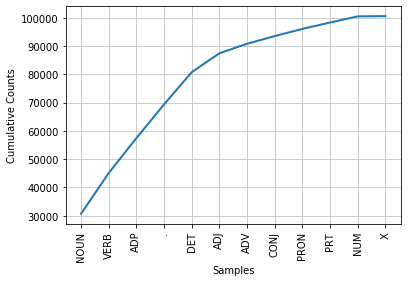

In [69]:
tag_fd.plot(cumulative = True);

*Nouns and verbs make up nearly half of the tags.*

*We can use the `nltk.app.concordance()` method to search for any combination of words and POS tags.  Calling the method opens up the app in a new window, so I'm not going to leave the call in this notebook.*

#### 2.4 Nouns

*Using tags and `FreqDist` to find the most common POS before nouns:*

In [73]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
print([tag for (tag, _) in fdist.most_common()], end = '')

['NOUN', 'DET', 'ADJ', 'ADP', '.', 'VERB', 'CONJ', 'NUM', 'ADV', 'PRT', 'PRON', 'X']

#### 2.5 Verbs

*Finding the most common verbs in a corpus:*

In [76]:
wsj = nltk.corpus.treebank.tagged_words(tagset = 'universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common(200) if wt[1] == 'VERB'], end = '')

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would', 'were', 'had', 'been', 'could', "'s", 'can', 'do', 'say', 'make', 'may', 'did', 'rose', 'made', 'does', 'expected', 'buy', 'take', 'get']

*Using a `ConditionalFreqDist` to see which tags are most common for homonyms:*

In [83]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VB', 28), ('NN', 20)]

In [78]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

*Finding the most likely words for a given tag:*

In [81]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(list(cfd2['VBN'])[:30], end = '')

['named', 'used', 'caused', 'exposed', 'reported', 'replaced', 'sold', 'died', 'expected', 'diagnosed', 'studied', 'industrialized', 'owned', 'found', 'classified', 'rejected', 'outlawed', 'imported', 'tracked', 'thought', 'considered', 'elected', 'based', 'lifted', 'ensnarled', 'voted', 'been', 'held', 'banned', 'renovated']

*Finding words that were both `VBD` (past tense) and `VBN` (past participle).  Also looking at some surrounding text:*

In [85]:
print([w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]][:20], end = '')

['named', 'used', 'caused', 'reported', 'said', 'stopped', 'heard', 'studied', 'led', 'replaced', 'sold', 'worked', 'died', 'found', 'rejected', 'imposed', 'made', 'dumped', 'imported', 'mixed']

In [88]:
idx1 = wsj.index(('kicked', 'VBD'))
print(wsj[idx1 - 4:idx1 + 1], end = '')

[('While', 'IN'), ('program', 'NN'), ('trades', 'NNS'), ('swiftly', 'RB'), ('kicked', 'VBD')]

In [89]:
idx2 = wsj.index(('kicked', 'VBN'))
print(wsj[idx2 - 4:idx2 + 1], end = '')

[('head', 'NN'), ('of', 'IN'), ('state', 'NN'), ('has', 'VBZ'), ('kicked', 'VBN')]

__Your Turn:__ Given the list of past participles produced by `list(cfd2['VBN'])`, try to collect a list of all the word-tag pairs that immediately precede items in that list.

In [92]:
word_tag_pairs = nltk.bigrams(nltk.corpus.treebank.tagged_words())
verb_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'VBN']
fdist = nltk.FreqDist(verb_preceders)
print([tag for (tag, _) in fdist.most_common()], end = '')

['VBZ', 'VBD', 'RB', 'VB', 'VBP', 'NNS', ',', 'NN', 'DT', '-NONE-', 'VBN', 'CC', 'IN', 'VBG', 'JJ', '``', 'CD', 'POS', 'NNP', '.', '-LRB-', ':', 'PRP$', 'RBR', 'PRP', 'TO', 'JJS', "''", 'JJR', 'RBS', '-RRB-']

#### 2.6 Adjectives and Adverbs

*__No notes.__*

#### 2.7 Unsimplified Tags

*This is a function that finds examples of tags that start with a given prefix:*

In [93]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                   if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [94]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories = 'news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

#### 2.8 Exploring Tagged Corpora

*Words that follow 'often':*

In [96]:
brown_learned_text = brown.words(categories = 'learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')), end = '')

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']

*More instructive would be to look at what POS follow 'often':*

In [97]:
brown_lrnd_tagged = brown.tagged_words(categories = 'learned', tagset = 'universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


*Another example, here with sequences of (`"<Verb> to <Verb>"`).  I added some code to make the returned phrases print out on the same line:*

In [101]:
from nltk.corpus import brown

def process(sentence, end = ' '):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3 + ";", end = end)

In [103]:
for tagged_sent in brown.tagged_sents(categories = 'humor'):
    process(tagged_sent)

paused to get; proceeded to search; began to suspect; endeavoring to cut; wanted to know; daring to commit; given to dig; urged to attend; refused to receive; beckoned to cross; taken to keep; trying to hold; managing to get; promised to illustrate; pretending to black; wanted to remind; Resolving to get; started to start; starting to woolgather; bound to get; wanted to keep; looked to see; chosen to complement; live to hear; leaping to light; trying to prove; trying to determine; supposed to put; proceeded to neglect; care to count; shuddered to think; telephoned to announce; neglected to consider; trouble to memorize; deigned to appear; seemed to understand; try to revive; seemed to produce; returning to jump; tried to farm; going to set; turned to stare; seem to think; liked to hire; remember to telephone; like to work; like to disclose; got to put; got to run; waiting to get; need to worry; seems to think; tries to baffle; mean to reconsider; refused to make; seems to make; seems t

*Looking up ambiguous words that have three or more different tags.  Results are quite different from those in the book.*

In [112]:
brown_news_tagged = brown.tagged_words(categories = 'news', tagset = 'universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


__Your Turn:__ Open the POS concordance tool `nltk.app.concordance()` and load the complete Brown Corpus (simplified tagset). Now pick some of the above words and see how the tag of the word correlates with the context of the word. E.g. search for `near` to see all forms mixed together, `near/ADJ` to see it used as an adjective, `near N` to see just those cases where a noun follows, and so forth. For a larger set of examples, modify the supplied code so that it lists words having three distinct tags.

*As before, `nltk.app.concordance()` opens in a new window, so I won't be running this in this jupyter notebook.*

### 3   Mapping Words to Properties Using Python Dictionaries

#### 3.1 Indexing Lists vs Dictionaries

*__No notes.__*

#### 3.2 Dictionaries in Python

